In [40]:
import numpy as np
import h5py
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization,Reshape
from keras import optimizers
import tensorflow as tf
tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(100)
import matplotlib.pyplot as plt

## Data fetching and understand the train/val/test splits. (10 points)

### To import the .h5 file, we use the h5py library. 

In [2]:
data=h5py.File('SVHN_single_grey1.h5','r')

### Splitting the data into Train, Test and Validation Sets


In [3]:
trainX = data['X_train'][:]
trainY = data['y_train'][:]
testX = data['X_test'][:]
testY = data['y_test'][:]
valX = data['X_val'][:]
valY = data['y_val'][:]

### Testing the size of Training, Testing and Validation Datasets

In [4]:
print('Size of trainX is ',trainX.shape,' and trainY is ', trainY.shape)
print('Size of testX is ',testX.shape,' and testY is ', testY.shape)
print('Size of ValX is ',valX.shape,' and ValY is ', valY.shape)

Size of trainX is  (42000, 32, 32)  and trainY is  (42000,)
Size of testX is  (18000, 32, 32)  and testY is  (18000,)
Size of ValX is  (60000, 32, 32)  and ValY is  (60000,)


#### Here we have the images of dimension 32x32x1. 

### Closing the file as we have already split the data into Train, Test and Validation Sets

In [5]:
data.close()

### Visulising how the data looks like

In [6]:
import matplotlib.pyplot as plt

plt.imshow(trainX[9])
plt.show()

<Figure size 640x480 with 1 Axes>

### One Hot Encoding the Output columns


In [7]:
trainY=tf.keras.utils.to_categorical(trainY)
Ytest=tf.keras.utils.to_categorical(testY)
valY=tf.keras.utils.to_categorical(valY)

# Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (15 points)

In [8]:
# Creating a model with Sequential ()
tf.compat.v1.reset_default_graph()
model=tf.keras.Sequential()

#Creating a layer to reshape the input
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Adding dense layers

    
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='relu'))


model.add(tf.keras.layers.Dense(10,activation='sigmoid'))


### Adding a layer for calculating Loss

In [9]:
model.compile(loss='mse',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 297,610
Trainable params: 297,098
Non-trainable params: 512
_________________________________________________________________


### Fitting the model on the data

In [10]:
model.fit(trainX,trainY,batch_size=100,epochs=10,validation_data=(valX,valY))

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 71us/sample - loss: 0.0703 - accuracy: 0.4882 - val_loss: 0.0640 - val_accuracy: 0.5207
Epoch 2/10
42000/42000 [==============================] - 2s 55us/sample - loss: 0.0498 - accuracy: 0.6564 - val_loss: 0.0640 - val_accuracy: 0.5091
Epoch 3/10
42000/42000 [==============================] - 3s 61us/sample - loss: 0.0447 - accuracy: 0.6843 - val_loss: 0.0538 - val_accuracy: 0.6023
Epoch 4/10
42000/42000 [==============================] - 2s 59us/sample - loss: 0.0422 - accuracy: 0.7027 - val_loss: 0.0495 - val_accuracy: 0.6356
Epoch 5/10
42000/42000 [==============================] - 2s 52us/sample - loss: 0.0402 - accuracy: 0.7175 - val_loss: 0.0540 - val_accuracy: 0.6230
Epoch 6/10
42000/42000 [==============================] - 2s 52us/sample - loss: 0.0383 - accuracy: 0.7328 - val_loss: 0.0608 - val_accuracy: 0.5468
Epoch 7/10
42000/42000 [==============================] 

### Testing the accuracy on Training Set

In [11]:
model.evaluate(testX,Ytest)[1]

18000/18000 [==============================] - 1s 38us/sample - loss: 0.0447 - accuracy: 0.6804


0.68038887

### Confusion Matrix

In [12]:
pred=model.predict_classes(testX)


label=np.argmax(Ytest.T, axis=0)
print(confusion_matrix(label,pred))


[[1192   50   32   37   87   17  236   25   19  119]
 [  33 1387   26   62  140   19   37   61   13   50]
 [  11   64 1364   59   81   39   34   73   21   57]
 [  36   67   40 1006   58  278   70   34   94   36]
 [  28   42   45   50 1481   35   68   19   12   32]
 [  28   32   21  149   41 1211  196   28   28   34]
 [  86   29   20   42   91  104 1280   19  125   36]
 [  30  133  104   39   64   50   32 1276    5   75]
 [  40   50   38  127   57  100  457   25  828   90]
 [  36   64   33   79   65  122  116   21   46 1222]]


### Classification Report

In [13]:
print(classification_report(pred, label))   


              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1520
           1       0.76      0.72      0.74      1918
           2       0.76      0.79      0.77      1723
           3       0.59      0.61      0.60      1650
           4       0.82      0.68      0.74      2165
           5       0.68      0.61      0.65      1975
           6       0.70      0.51      0.59      2526
           7       0.71      0.81      0.75      1581
           8       0.46      0.70      0.55      1191
           9       0.68      0.70      0.69      1751

   micro avg       0.68      0.68      0.68     18000
   macro avg       0.68      0.69      0.68     18000
weighted avg       0.69      0.68      0.68     18000




# Understand and be able to implement (vectorised) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (15 points)

In [14]:
# Creating a model with Sequential ()
tf.compat.v1.reset_default_graph()
model1=tf.keras.Sequential()

#Creating a layer to reshape the input
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Adding dense layers

    
model1.add(tf.keras.layers.Dense(256,activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(128,activation='relu'))

model1.add(tf.keras.layers.Dense(10,activation='sigmoid'))


### Stochastic Gradient Descent Optimizer

In [15]:
#HyperTuning the learning rate and decay
sgd=tf.keras.optimizers.SGD(lr=0.03,decay=0)

model1.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 297,610
Trainable params: 297,098
Non-trainable params: 512
_________________________________________________________________


In [16]:
model1.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 297,610
Trainable params: 297,098
Non-trainable params: 512
_________________________________________________________________


In [17]:
model1.fit(trainX,trainY, batch_size = 1000, epochs = 10, verbose = 1,validation_data=(valX,valY))


Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 29us/sample - loss: 0.6123 - accuracy: 0.6965 - val_loss: 0.4517 - val_accuracy: 0.8774
Epoch 2/10
42000/42000 [==============================] - 1s 24us/sample - loss: 0.4192 - accuracy: 0.8748 - val_loss: 0.4056 - val_accuracy: 0.8880
Epoch 3/10
42000/42000 [==============================] - 1s 25us/sample - loss: 0.3743 - accuracy: 0.8933 - val_loss: 0.3714 - val_accuracy: 0.8928
Epoch 4/10
42000/42000 [==============================] - 1s 24us/sample - loss: 0.3539 - accuracy: 0.8972 - val_loss: 0.3483 - val_accuracy: 0.8969
Epoch 5/10
42000/42000 [==============================] - 1s 24us/sample - loss: 0.3407 - accuracy: 0.8987 - val_loss: 0.3354 - val_accuracy: 0.8989
Epoch 6/10
42000/42000 [==============================] - 1s 25us/sample - loss: 0.3309 - accuracy: 0.8994 - val_loss: 0.3284 - val_accuracy: 0.8996
Epoch 7/10
42000/42000 [==============================] 

### Testing the accuracy on test Set

In [18]:
model1.evaluate(testX,Ytest)

18000/18000 [==============================] - 1s 45us/sample - loss: 0.3056 - accuracy: 0.9003


[0.30555301745732627, 0.9002766]

### There is a considerable increase in accuracy from 68.03% to 90.02% by adding Cost Functions and Gradient Descent Optimizer. 


### Confusion Matrix

In [19]:
m1_pred=model1.predict_classes(testX)

label=np.argmax(Ytest.T, axis=0)
print(confusion_matrix(label,m1_pred))

[[ 618  190   28  155  113  107  200   98  142  163]
 [  67 1057   35  138  131   32   53  186   78   51]
 [ 113  303  352  230  113   66   80  315   99  132]
 [ 111  321   54  367  103   93  141  216  205  108]
 [  89  391   16  115  844   37  122   68   69   61]
 [ 170  250   30  242   95  156  296  155  181  193]
 [ 225  227   21  125  194  121  534   66  185  134]
 [  84  305   72  141   49   34   44  963   49   67]
 [ 183  265   26  164  177   78  279   77  381  182]
 [ 217  235   21  171  110   80   95  151  225  499]]


### Classification Report


In [20]:
print(classification_report(m1_pred,label))

              precision    recall  f1-score   support

           0       0.34      0.33      0.33      1877
           1       0.58      0.30      0.39      3544
           2       0.20      0.54      0.29       655
           3       0.21      0.20      0.21      1848
           4       0.47      0.44      0.45      1929
           5       0.09      0.19      0.12       804
           6       0.29      0.29      0.29      1844
           7       0.53      0.42      0.47      2295
           8       0.21      0.24      0.22      1614
           9       0.28      0.31      0.29      1590

   micro avg       0.32      0.32      0.32     18000
   macro avg       0.32      0.33      0.31     18000
weighted avg       0.37      0.32      0.33     18000



# Implement batch normalization for training the neural network (10points)

In [21]:
tf.compat.v1.reset_default_graph()

model2=tf.keras.Sequential()
#model2.add(tf.keras.layers.BatchNormalization())

#Creating a layer to reshape the input
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Adding dense layers

    
model2.add(tf.keras.layers.Dense(256,activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10,activation='sigmoid'))




### Adding the Optimization Layer

In [22]:
#HyperTuning the learning rate and decay
sgd=tf.keras.optimizers.SGD(lr=0.03,decay=0)

model2.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])


In [23]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### Fitting the model on train data and testing on Validation Data

In [24]:
model2.fit(trainX,trainY,batch_size=100,epochs=10,validation_data=(valX,valY))

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.6928 - accuracy: 0.6611 - val_loss: 0.3768 - val_accuracy: 0.8923
Epoch 2/10
42000/42000 [==============================] - 3s 62us/sample - loss: 0.4126 - accuracy: 0.8539 - val_loss: 0.3100 - val_accuracy: 0.8999
Epoch 3/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.3551 - accuracy: 0.8859 - val_loss: 0.2938 - val_accuracy: 0.9004
Epoch 4/10
42000/42000 [==============================] - 3s 68us/sample - loss: 0.3328 - accuracy: 0.8926 - val_loss: 0.2793 - val_accuracy: 0.9019
Epoch 5/10
42000/42000 [==============================] - 3s 76us/sample - loss: 0.3168 - accuracy: 0.8956 - val_loss: 0.2647 - val_accuracy: 0.9040
Epoch 6/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.3035 - accuracy: 0.8984 - val_loss: 0.2522 - val_accuracy: 0.9068
Epoch 7/10
42000/42000 [==============================] 

### Evaluating the performance on Test Data

In [25]:
model2.evaluate(testX,Ytest)

18000/18000 [==============================] - 1s 40us/sample - loss: 0.2266 - accuracy: 0.9162


[0.22660419596566095, 0.9161725]

### The model has performed better ( from 90.02% to 91.60%) with Batch Normalization and Drop Out layers added. 

### Confusion Matrix

In [26]:
m2_pred=model2.predict_classes(testX)

label=np.argmax(Ytest.T,axis=0)
print(confusion_matrix(label,m2_pred))

[[1320   43   25   48   53   41   94   27   59  104]
 [  93 1234   32  110  114   72   30   64   36   43]
 [  84   81 1114  106   67   41   17  178   29   86]
 [  90   88   64 1118   52  158   19   66   30   34]
 [  73   72   21   36 1427   34   75   18   19   37]
 [ 102   49   22  192   57 1056  112   34   76   68]
 [ 211   49   17   39  162  102 1135   16   78   23]
 [  97   98   88   97   26   43   28 1273   14   44]
 [ 204   74   41   85  118  196  215   23  750  106]
 [ 301   85   33   88   61   92   32   40   43 1029]]


### Classification Report

In [27]:
print(classification_report(m2_pred,label))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60      2575
           1       0.68      0.66      0.67      1873
           2       0.62      0.76      0.68      1457
           3       0.65      0.58      0.61      1919
           4       0.79      0.67      0.72      2137
           5       0.60      0.58      0.59      1835
           6       0.62      0.65      0.63      1757
           7       0.70      0.73      0.72      1739
           8       0.41      0.66      0.51      1134
           9       0.57      0.65      0.61      1574

   micro avg       0.64      0.64      0.64     18000
   macro avg       0.64      0.65      0.63     18000
weighted avg       0.65      0.64      0.64     18000



## Trying to improve the model by adding one more layer with Batch Normalisation and Dropouts

In [28]:
tf.compat.v1.reset_default_graph()

model3=tf.keras.Sequential()
#model3.add(tf.keras.layers.BatchNormalization())

#Creating a layer to reshape the input
model3.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Adding dense layers

    
model3.add(tf.keras.layers.Dense(256,activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Dense(128,activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dense(64,activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(10,activation='sigmoid'))


### Adding the Optimization Layer

In [29]:
#HyperTuning the learning rate and decay
adam=tf.keras.optimizers.Adamax(lr=0.03,decay=0)

model3.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])


In [30]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

### Fitting the model on train data and testing on Validation Data. (Training for longer time as the model has higher accuracy)

In [32]:
model3.fit(trainX,trainY,batch_size=100,epochs=100,validation_data=(valX,valY))

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 54us/sample - loss: 0.2366 - accuracy: 0.9135 - val_loss: 0.2330 - val_accuracy: 0.9164
Epoch 2/100
42000/42000 [==============================] - 2s 55us/sample - loss: 0.2188 - accuracy: 0.9218 - val_loss: 0.2360 - val_accuracy: 0.9200
Epoch 3/100
42000/42000 [==============================] - 2s 55us/sample - loss: 0.2095 - accuracy: 0.9258 - val_loss: 0.2016 - val_accuracy: 0.9303
Epoch 4/100
42000/42000 [==============================] - 2s 55us/sample - loss: 0.2024 - accuracy: 0.9290 - val_loss: 0.2228 - val_accuracy: 0.9223
Epoch 5/100
42000/42000 [==============================] - 2s 59us/sample - loss: 0.1991 - accuracy: 0.9299 - val_loss: 0.1736 - val_accuracy: 0.9402
Epoch 6/100
42000/42000 [==============================] - 3s 78us/sample - loss: 0.1977 - accuracy: 0.9310 - val_loss: 0.1828 - val_accuracy: 0.9367
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.1527 - accuracy: 0.9473 - val_loss: 0.1246 - val_accuracy: 0.9569
Epoch 56/100
42000/42000 [==============================] - 3s 69us/sample - loss: 0.1518 - accuracy: 0.9473 - val_loss: 0.1311 - val_accuracy: 0.9550
Epoch 57/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.1521 - accuracy: 0.9474 - val_loss: 0.1217 - val_accuracy: 0.9582
Epoch 58/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.1529 - accuracy: 0.9469 - val_loss: 0.1298 - val_accuracy: 0.9557
Epoch 59/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.1513 - accuracy: 0.9474 - val_loss: 0.1164 - val_accuracy: 0.9605
Epoch 60/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.1498 - accuracy: 0.9482 - val_loss: 0.1162 - val_accuracy: 0.9604
Epoch 61/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.1499 - ac

### Evaluating the performance on Test Data

In [33]:
model3.evaluate(testX,Ytest)

18000/18000 [==============================] - 1s 42us/sample - loss: 0.1154 - accuracy: 0.9624s - loss: 0.1104 - ac


[0.11535449461473359, 0.96239984]

## Here we have the highest accuracy of 96.23


### Confusion Matrix

In [35]:
m3_pred=model3.predict_classes(testX)

label=np.argmax(Ytest.T,axis=0)
print(confusion_matrix(label,m3_pred))

[[1526   42   22   28   32   29   42   18   28   47]
 [  48 1513   33   52   54   30   18   39   23   18]
 [  19   32 1477   40   30   30   14   77   35   49]
 [  26   34   41 1241   26  214   18   39   53   27]
 [  41   57   41   21 1487   37   58   10   18   42]
 [  21   12   18   84   18 1460   59   15   52   29]
 [  52   33   18   26   54  131 1404    8   91   15]
 [  35   68   98   36   20   35   18 1451   18   29]
 [  33   48   31   49   24  119   90   13 1338   67]
 [  76   34   30   42   25  112   20   22   68 1375]]


### Classification Report

In [38]:
print(classification_report(m3_pred,label))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1877
           1       0.83      0.81      0.82      1873
           2       0.82      0.82      0.82      1809
           3       0.72      0.77      0.74      1619
           4       0.82      0.84      0.83      1770
           5       0.83      0.66      0.74      2197
           6       0.77      0.81      0.79      1741
           7       0.80      0.86      0.83      1692
           8       0.74      0.78      0.76      1724
           9       0.76      0.81      0.79      1698

   micro avg       0.79      0.79      0.79     18000
   macro avg       0.79      0.80      0.79     18000
weighted avg       0.79      0.79      0.79     18000



## Testing the result of predictions with actual images


0


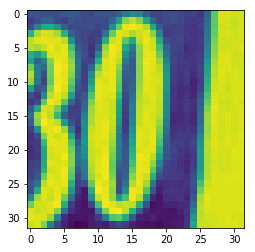

In [52]:
plt.imshow(testX[4])
print(m3_pred[4])

9


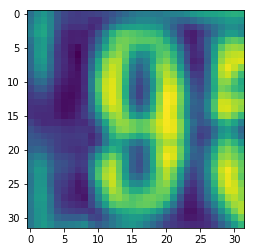

In [49]:
plt.imshow(testX[3])
print(m3_pred[3])

0


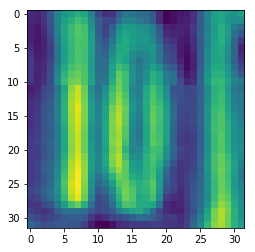

In [54]:
plt.imshow(testX[234])
print(m3_pred[234])